<a href="https://colab.research.google.com/github/Saifullah785/machine-learning-engineer-roadmap/blob/main/Lecture_55_polynomial_regression/Lecture_55_polynomial_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [74]:
# importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression,SGDRegressor

from sklearn.preprocessing import PolynomialFeatures, StandardScaler

from sklearn.linear_model import LinearRegression

from sklearn.metrics import r2_score

from sklearn.pipeline import Pipeline

In [75]:
# Generate synthetic data for polynomial regression

X = 6 * np.random.rand(200, 1) - 3
y = 0.8 * X**2 + 0.9 * X + 2 + np.random.randn(200, 1)

# y = 0.8 x^2 + 0.9x + 2  # True underlying relationship

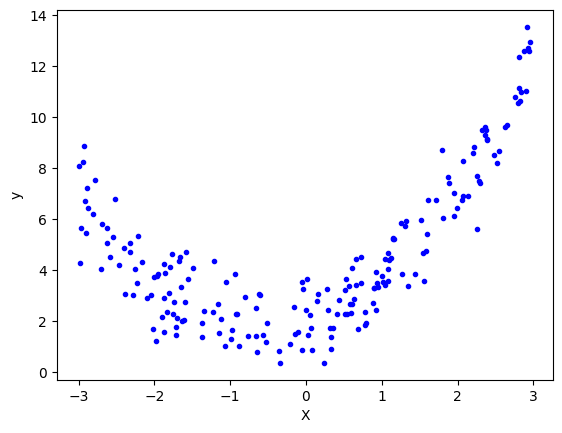

In [76]:
# # Visualize the generated data

plt.plot(X, y, "b.")

plt.xlabel("X")

plt.ylabel("y")

plt.show()

In [77]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [78]:
# Apply simple Linear Regression to the data
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [79]:
# Make predictions with Linear Regression and evaluate R-squared score

y_pred = lin_reg.predict(X_test)
r2_score(y_test, y_pred)

0.32818278693727765

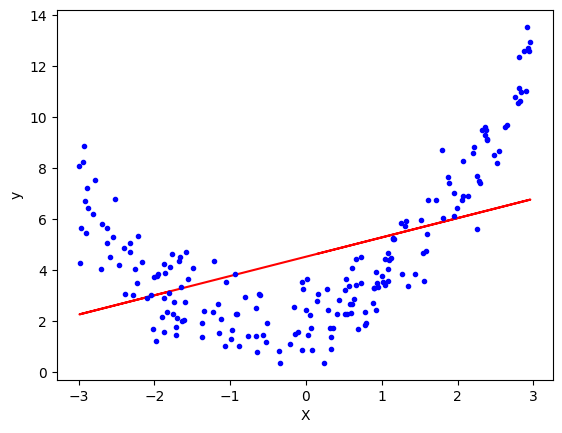

In [80]:
# Visualize the Linear Regression fit

plt.plot(X_train,lin_reg.predict(X_train),color='r')
plt.plot(X, y, 'b.')
plt.xlabel("X")
plt.ylabel("y")
plt.show()


In [81]:
# applying Polynomial Linear regression with degree 2
poly_reg = PolynomialFeatures(degree=2,include_bias=True)
X_train_trans = poly_reg.fit_transform(X_train)
X_test_trans = poly_reg.transform(X_test)

In [82]:
# Print original and transformed training data for comparison

print(X_train[0])
print(X_train_trans[0])

[0.15641006]
[1.         0.15641006 0.02446411]


In [83]:
# Train a Linear Regression model on the polynomial features

lin_reg = LinearRegression()
lin_reg.fit(X_train_trans, y_train)


LinearRegression()

In [84]:
# Make predictions with Polynomial Linear Regression and evaluate R-squared score

y_pred = lin_reg.predict(X_test_trans)
r2_score(y_test, y_pred)

0.8793059358457732

In [85]:
# Print the coefficients and intercept of the Polynomial Linear Regression model

print (lin_reg.coef_)
print (lin_reg.intercept_)

[[0.         0.86220643 0.8410368 ]]
[2.05382978]


In [86]:
# Generate new data points for plotting the polynomial regression curve

X_new = np.linspace(-3, 3, 200).reshape(200, 1)
X_new_poly = poly_reg.transform(X_new)
y_new = lin_reg.predict(X_new_poly)

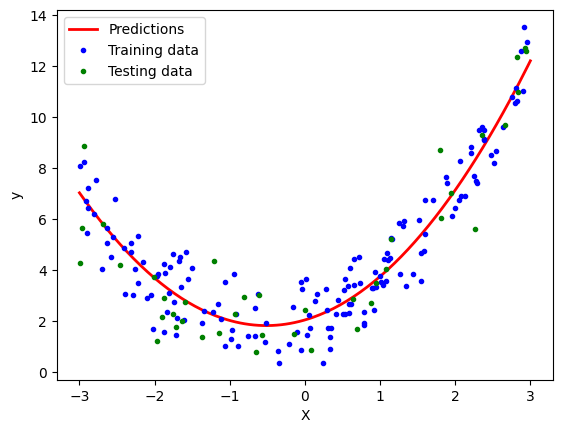

In [87]:
# Visualize the Polynomial Linear Regression fit, training data, and testing data

plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.plot(X_train, y_train, "b.", label="Training data")
plt.plot(X_test, y_test, "g.", label="Testing data")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

In [88]:
# Define a function to perform and visualize polynomial regression for different degrees

def polynomial_regression(degree):
    X_new=np.linspace(-3, 3, 100).reshape(100, 1)
    X_new_poly = poly_reg.transform(X_new)

    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig,'r', label="Degree " + str(degree), linewidth=2)

    plt.plot(X_train, y_train, "b.", linewidth=3)
    plt.plot(X_test, y_test, "g.", linewidth=3)
    plt.legend(loc="upper left")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.axis([-3, 3, 0, 10])
    plt.show()

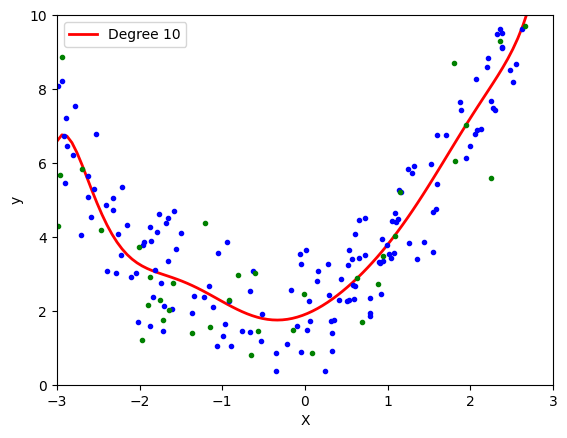

In [89]:
# Call the polynomial_regression function with degree 10

polynomial_regression(10)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



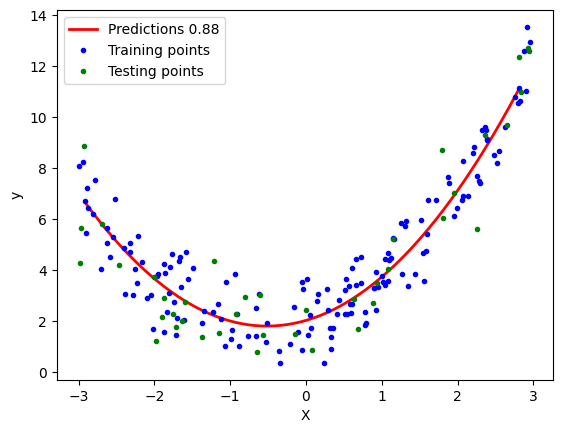

In [90]:
# Applying Gradient Descent for polynomial regression

poly = PolynomialFeatures(degree=2)

X_train_trans = poly.fit_transform(X_train)
X_test_trans = poly.transform(X_test)

sgd = SGDRegressor(max_iter=100)
sgd.fit(X_train_trans,y_train)

X_new=np.linspace(-2.9, 2.8, 200).reshape(200, 1)
X_new_poly = poly.transform(X_new)
y_new = sgd.predict(X_new_poly)

y_pred = sgd.predict(X_test_trans)

# Visualize the Gradient Descent polynomial regression fit

plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions " + str(round(r2_score(y_test,y_pred),2)))
plt.plot(X_train, y_train, "b.",label='Training points')
plt.plot(X_test, y_test, "g.",label='Testing points')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()


In [91]:
# Generate synthetic data for 3D polynomial regression

x = 7 * np.random.rand(100, 1) - 2.8
y = 7 * np.random.rand(100, 1) - 2.8

z = x**2 + y**2 + 0.2*x + 0.2*y + 0.1*x*y +2 + np.random.randn(100, 1)
# z = x^2 + y^2 + 0.2x + 0.2y + 0.1xy + 2

In [92]:
# Visualize the 3D data using Plotl

import plotly.express as px
df = px.data.iris()
fig = px.scatter_3d(df, x=x.ravel(), y=y.ravel(), z=z.ravel())
fig.show()

In [93]:
# Apply Linear Regression to the 3D data

lr = LinearRegression()
lr.fit(np.array([x,y]).reshape(100,2),z)

# Create a meshgrid for plotting the regression surface

x_input = np.linspace(x.min(), x.max(), 10)
y_input = np.linspace(y.min(), y.max(), 10)
xGrid, yGrid = np.meshgrid(x_input,y_input)

final = np.vstack((xGrid.ravel().reshape(1,100),yGrid.ravel().reshape(1,100))).T

# Predict z values for the meshgrid
z_final = lr.predict(final).reshape(10,10)

In [94]:
# Visualize the 3D data and the Linear Regression surface using Plotly

import plotly.graph_objects as go

fig = px.scatter_3d(df, x=x.ravel(), y=y.ravel(), z=z.ravel())

fig.add_trace(go.Surface(x = x_input, y = y_input, z =z_final ))

fig.show()

In [95]:
# Reshape the 3D input data for polynomial feature transformation

X_multi = np.array([x,y]).reshape(100,2)
X_multi.shape

(100, 2)

In [96]:
# Apply Polynomial Feature transformation (degree 5) to the 3D data

poly = PolynomialFeatures(degree=5)
X_multi_trans = poly.fit_transform(X_multi)

In [97]:
# Print information about the polynomial features

print("Input",poly.n_features_in_)
print("Ouput",poly.n_output_features_)
print("Powers\n",poly.powers_)

Input 2
Ouput 21
Powers
 [[0 0]
 [1 0]
 [0 1]
 [2 0]
 [1 1]
 [0 2]
 [3 0]
 [2 1]
 [1 2]
 [0 3]
 [4 0]
 [3 1]
 [2 2]
 [1 3]
 [0 4]
 [5 0]
 [4 1]
 [3 2]
 [2 3]
 [1 4]
 [0 5]]


In [98]:
# Print the shape of the transformed 3D data

X_multi_trans.shape

(100, 21)

In [99]:
# Train a Linear Regression model on the transformed 3D data

lr = LinearRegression()
lr.fit(X_multi_trans,z)

LinearRegression()

In [100]:
# Transform the meshgrid data using the polynomial features

X_test_multi = poly.transform(final)

In [101]:
# Predict z values for the transformed meshgrid using the trained model

z_final = lr.predict(X_multi_trans).reshape(10,10)

In [102]:
# Visualize the 3D data and the Polynomial Regression surface using Plotly

fig = px.scatter_3d(x=x.ravel(), y=y.ravel(), z=z.ravel())

fig.add_trace(go.Surface(x = x_input, y = y_input, z =z_final ))


# Update the z-axis range for better visualization

fig.update_layout(scene = dict(zaxis = dict(range=[0,35])))

fig.show()
#